In [2]:
train_path = 'train.csv'
test_path = 'test.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(train_path)

In [3]:
train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [4]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [5]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [7]:
train.describe(include='number')

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
train.describe(include='object')

,Sex
count,750000
unique,2
top,female
freq,375721


In [11]:
train['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

In [12]:
numerical_variables = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_variables = train.select_dtypes(exclude=[np.number]).columns.tolist()
numerical_variables.remove('id')

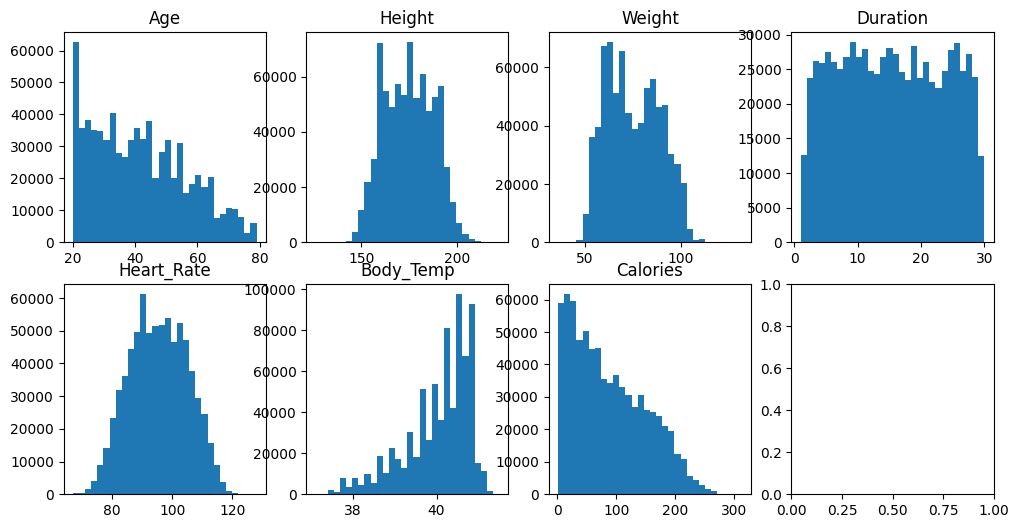

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
for i, var in enumerate(numerical_variables):
    axis = ax[i//4, i%4]
    axis.hist(train[var], bins=30)
    axis.set_title(var)


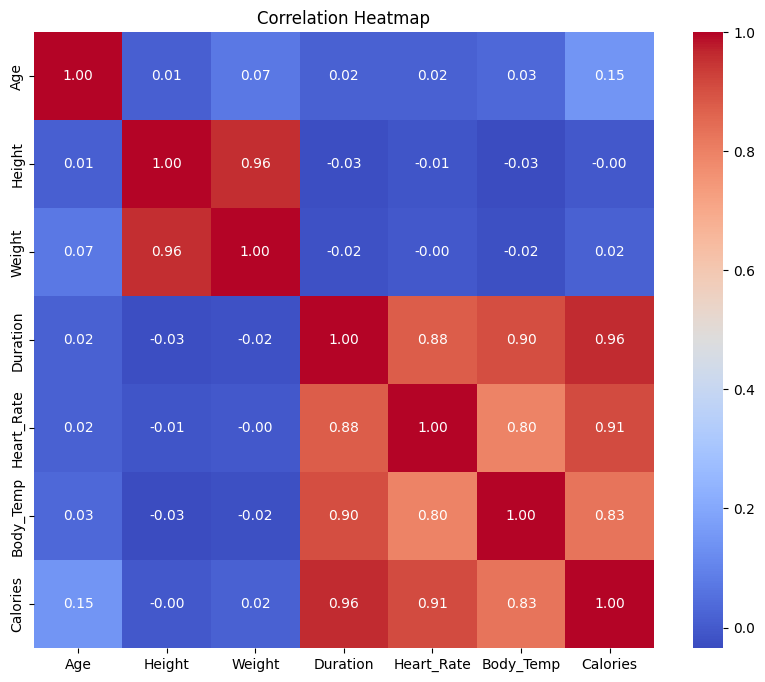

In [18]:
# Compute Correlation Matrix
correlation_matrix = train[numerical_variables].corr()

# Visualize Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

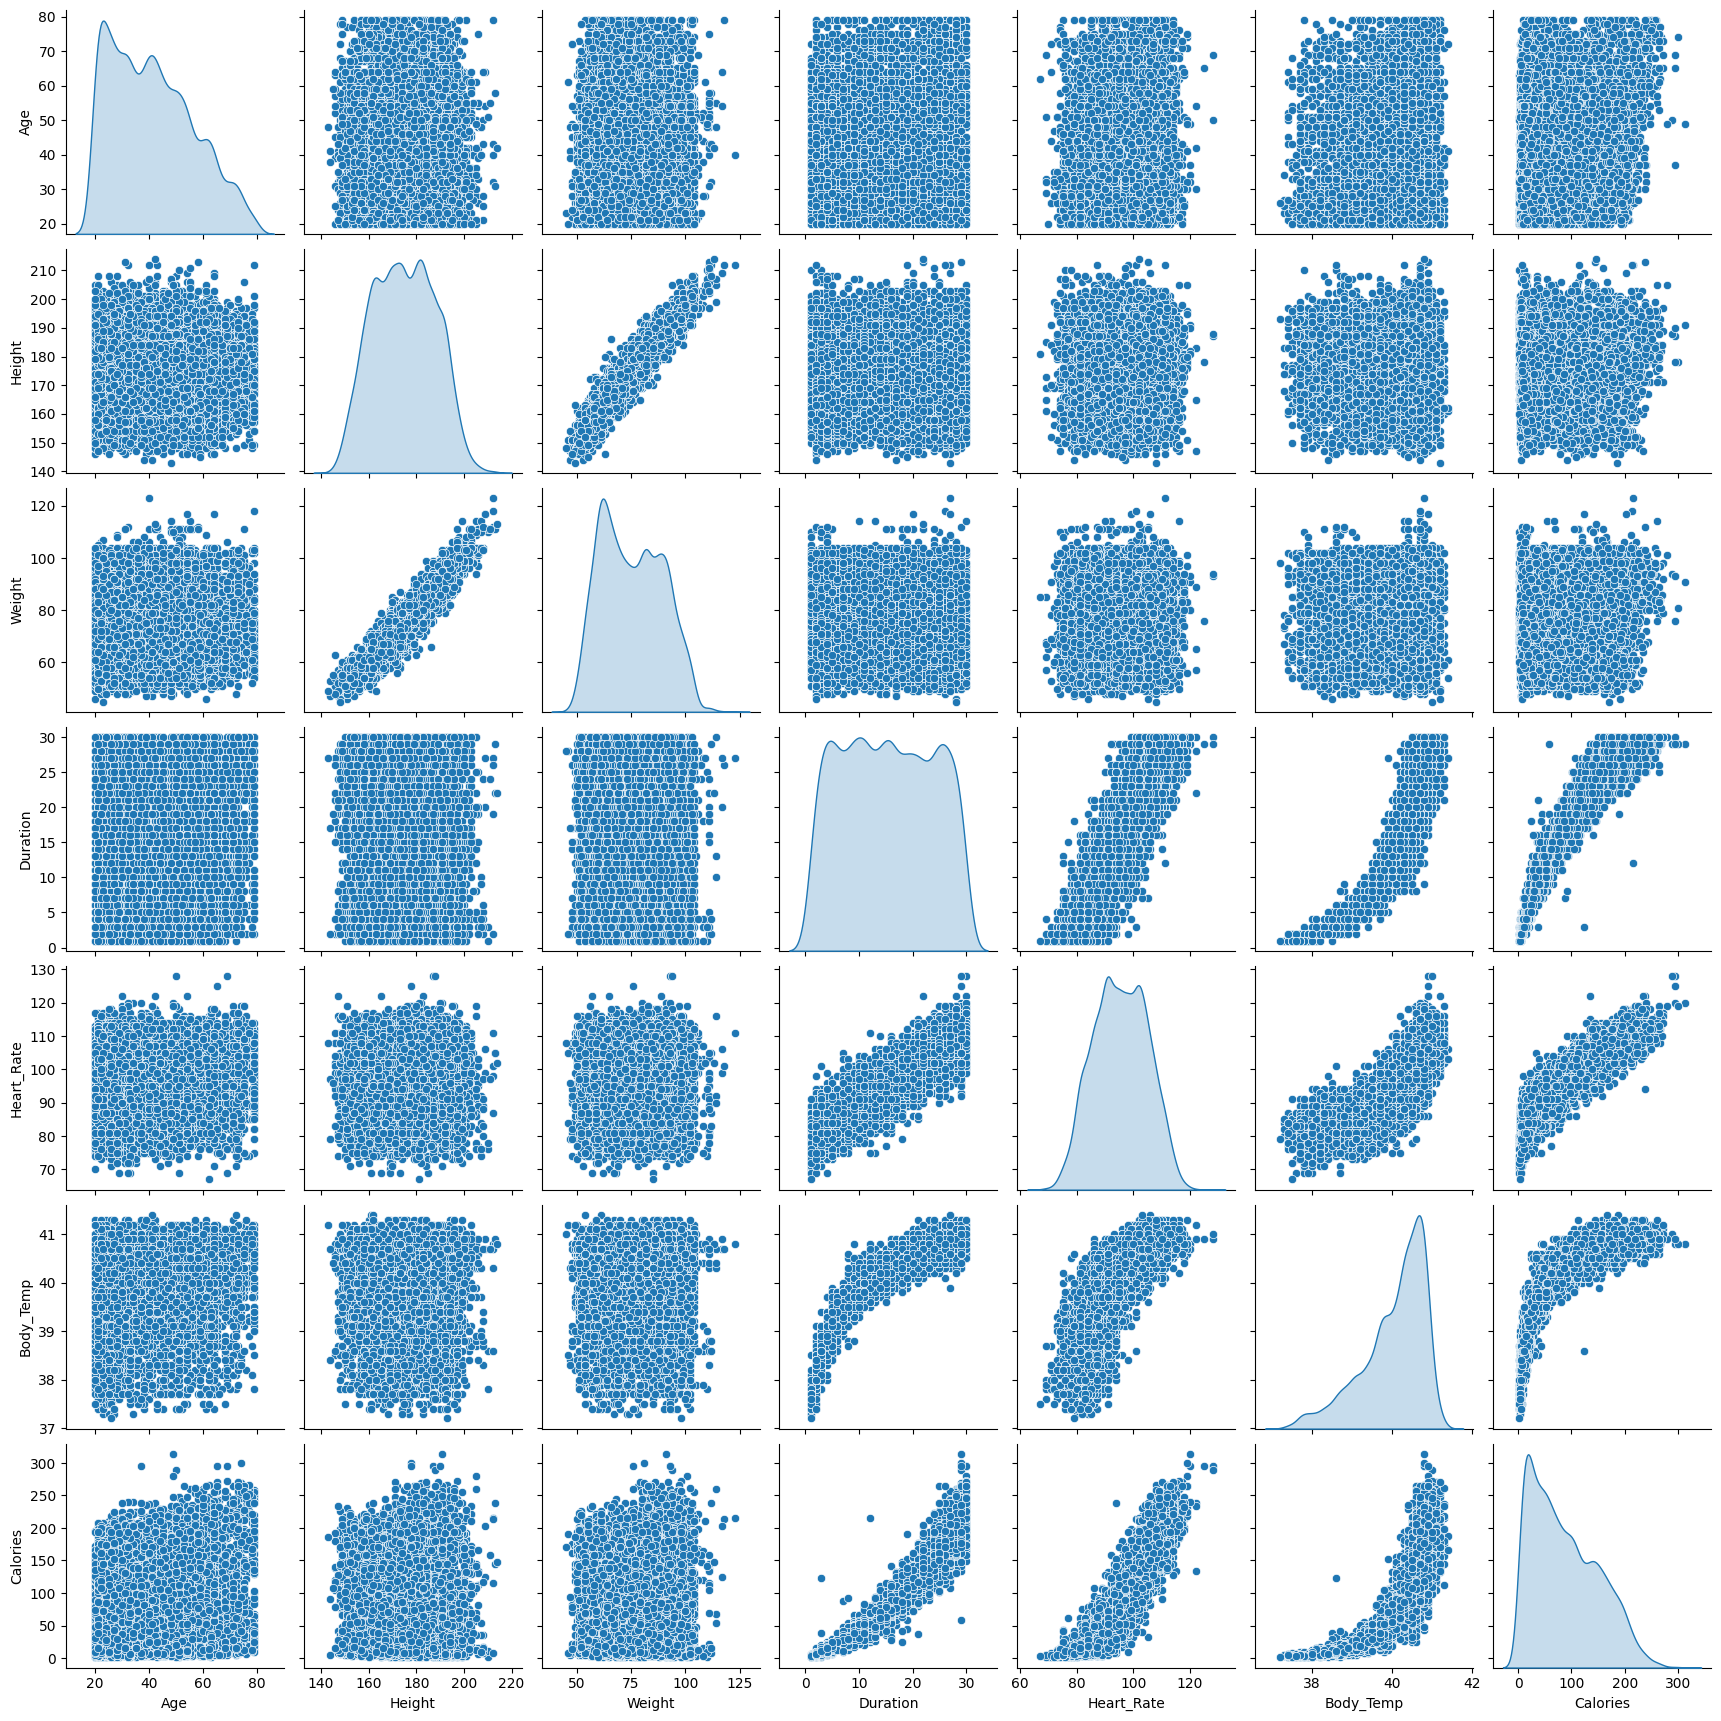

In [20]:
sns.pairplot(train.sample(10000)[numerical_variables], diag_kind='kde', markers='o')

In [21]:
train.groupby('Sex').mean()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex,,,,,,,,
female,375013.496068,41.273650,165.022200,63.726300,15.501013,95.397955,40.048655,87.534761
male,374985.450009,41.567724,184.410448,86.609032,15.340708,95.570366,40.023803,89.033683


In [23]:
indices = train['Sex']=='male'
males = train[indices]

In [ ]:
scaler_all = StandardScaler()
ma[numerical_variables] = scaler_all.fit_transform(train[numerical_variables])
train.head()

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn

# Prepare the data
X = males[numerical_variables[:-1]].values  # All numerical variables except 'Calories'
y = males['Calories'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training+validation and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training and validation sets (75% training, 25% validation of training+validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
model = MLP(input_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Train the model with early stopping
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_predictions = model(X_train_tensor)
    train_loss = criterion(train_predictions, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
    
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")
    
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

# Modification of some features

In [3]:
temp = train['Body_Temp']


(array([ 37429.,  57049.,  78639.,  77889., 122025., 140623., 115246.,
        108027.,  11423.,   1650.]),
 array([ 0.   ,  1.936,  3.872,  5.808,  7.744,  9.68 , 11.616, 13.552,
        15.488, 17.424, 19.36 ]),
 <BarContainer object of 10 artists>)

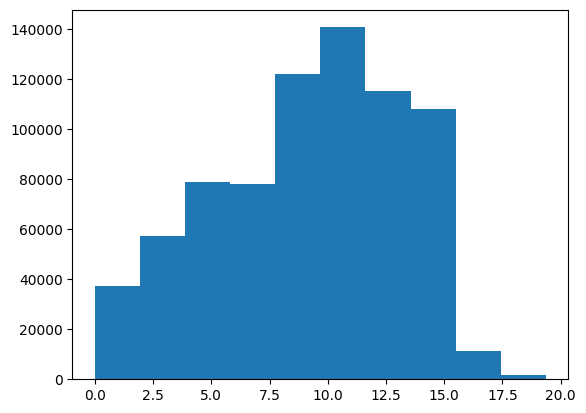

In [16]:
temp = temp-temp.min()
plt.hist(temp**2)

(array([180046., 142508., 114690., 100568.,  83402.,  70406.,  42551.,
         12836.,   2777.,    216.]),
 array([  1. ,  32.3,  63.6,  94.9, 126.2, 157.5, 188.8, 220.1, 251.4,
        282.7, 314. ]),
 <BarContainer object of 10 artists>)

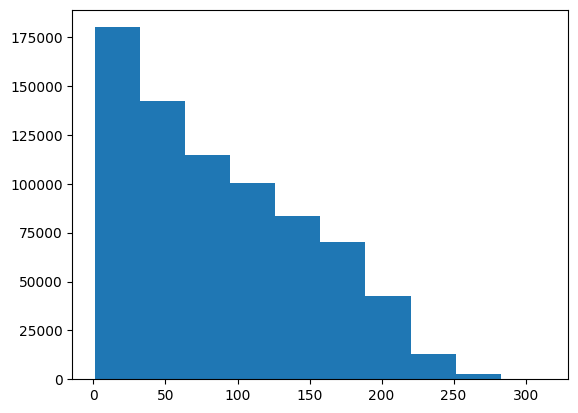

In [11]:
plt.hist(((train['Calories'])))
